# Chapter 13
## Section: Convolutional neural networks modeling using PyTorch

In [ ]:
!pip install torch
!pip install torchvision

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose([
	transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.3337, 0.3064, 0.3171), ( 0.2672, 0.2564, 0.2629))
])
batch_size = 6
n_class = 43
# Loading train and test sets of
# German Traffic Sign Recognition Benchmark (GTSRB) Dataset.
trainset = torchvision.datasets.GTSRB(root='../../data',
                                           split = 'train',
                                        download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.GTSRB(root='../../data',
                                          split = 'test',
                                       download=True,
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=batch_size,
                                         shuffle=False,
                                         num_workers=2)

100%|██████████| 187490228/187490228 [00:08<00:00, 22720623.29it/s]


Extracting ../../data/gtsrb/GTSRB-Training_fixed.zip to ../../data/gtsrb


100%|██████████| 88978620/88978620 [00:04<00:00, 21373237.65it/s]


Extracting ../../data/gtsrb/GTSRB_Final_Test_Images.zip to ../../data/gtsrb


100%|██████████| 99620/99620 [00:00<00:00, 440089.24it/s]


Extracting ../../data/gtsrb/GTSRB_Final_Test_GT.zip to ../../data/gtsrb


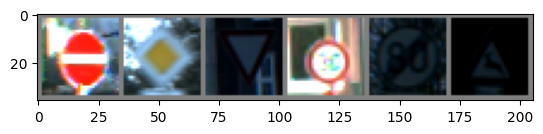

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, n_class)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [6]:
import torch.optim as optim

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
n_epoch = 3
for epoch in range(n_epoch):

    # running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the input data
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # output identification
        outputs = net(inputs)
        # loss calculation and backward propagation for parameter update
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print loss for every 1000 min-batches
        if i % 1000 == 999:
            print(f'[{epoch + 1}, {i + 1:3d}] loss: {loss.item() / 1000:.5f}')

[1, 1000] loss: 0.00348
[1, 2000] loss: 0.00085
[1, 3000] loss: 0.00074
[1, 4000] loss: 0.00032
[2, 1000] loss: 0.00021
[2, 2000] loss: 0.00022
[2, 3000] loss: 0.00061
[2, 4000] loss: 0.00002
[3, 1000] loss: 0.00000
[3, 2000] loss: 0.00000
[3, 3000] loss: 0.00077
[3, 4000] loss: 0.00001
